In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#libs

In [0]:
#numpy
import numpy as np

np.random.seed(42)

X =  2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

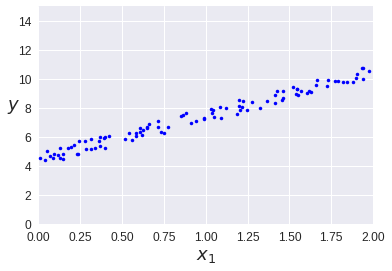

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

# Linear regression using the normal equation

We use numpy to compute the solution for the normal equation.

In [0]:
# add x0 = 1 to each instance
X_b = np.c_[np.ones((100, 1)), X]

In [6]:
X[:5]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728]])

In [7]:
X_b[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [0]:
# compute best weights using normal equation
w_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [9]:
w_best

array([[4.51359766],
       [2.98323418]])

In [10]:
X_new = np.array([[0], [2]])
# add x0 = 1 to each instance
X_new_b = np.c_[np.ones((2, 1)), X_new]  
y_predict = X_new_b.dot(w_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

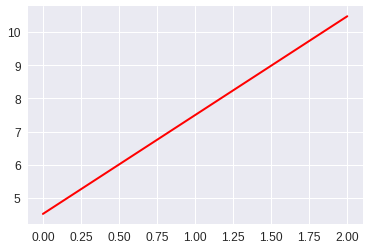

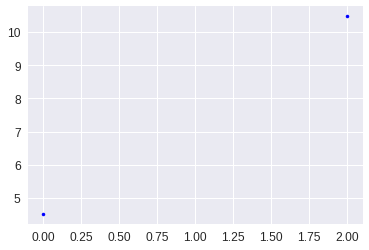

In [15]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.show()
plt.plot(X_new,y_predict,'b.')
plt.show()

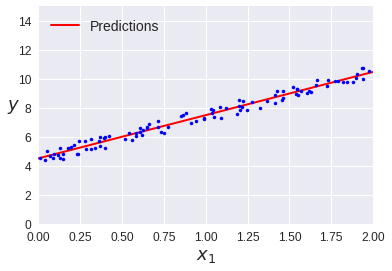

In [11]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

We use sklearn to compute the solution.

In [0]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [0]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

The ```LinearRegression``` class is based on the ```scipy.linalg.lstsq()``` function (the name stands for "least squares"), which you could call directly:

In [0]:
w_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
w_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes $X^+ y$, where  $X^+$ is the pseudoinverse of $X$ (specifically the Moore-Penrose inverse). You can use ```np.linalg.pinv()``` to compute the pseudoinverse directly:

In [0]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

The ```LinearRegression``` is based on the pseudoinverse, which ultimately relies on the SVD matrix decomposition of $X$. Its time complexity is  and it works even when  or when some features are linear combinations of other features (in these cases,  is not invertible so the Normal Equation fails).  

The ```LinearRegression``` class, in particular, it is based on an analytical solution, it does not scale well with the number of features, it scales linearly with the number of instances, all the data must fit in memory, it does not require feature scaling and the order of the instances in the training set does not matter.